# MLP-1c
- Dataset: EMNIST ByClass
- Model: MLP (1 hidden layer, 128 units, Sigmoid, Dropout 0.2)
- Batch Size: 2048
- Output Layer: 62 classes
- Accuracy

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import csv

In [2]:
# Load the dataset
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/byclass',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

# ds = tfds.load('mnist', split='train', shuffle_files=True)

def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    image = tf.reshape(image, [-1])
    return image, label

BATCH_SIZE = 2048
ds_train = ds_train.map(preprocess).shuffle(10000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

2025-07-14 00:58:20.961299: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Max
2025-07-14 00:58:20.961318: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2025-07-14 00:58:20.961322: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
I0000 00:00:1752422300.961331  232514 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1752422300.961346  232514 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28 * 28,)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(62, activation='softmax'),
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [4]:
history = model.fit(ds_train, epochs=50, validation_data=ds_test)

test_loss, test_accuracy = model.evaluate(ds_test)
print(f'Test accuracy: {test_accuracy:.4f}')

Epoch 1/50


2025-07-14 00:58:21.229046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-07-14 00:58:21.328738: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:387] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608


341/341 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.4037 - loss: 2.6186 - val_accuracy: 0.6684 - val_loss: 1.2278
Epoch 2/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.6617 - loss: 1.2297 - val_accuracy: 0.7183 - val_loss: 0.9831
Epoch 3/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.7049 - loss: 1.0322 - val_accuracy: 0.7450 - val_loss: 0.8684
Epoch 4/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.7288 - loss: 0.9314 - val_accuracy: 0.7631 - val_loss: 0.7927
Epoch 5/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.7455 - loss: 0.8609 - val_accuracy: 0.7758 - val_loss: 0.7388
Epoch 6/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.7570 - loss: 0.8102 - val_accuracy: 0.7857 - val_loss: 0.6988
Epoch 7/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.7653 - loss: 0.7743 - val_accuracy: 0.7922 - val_loss: 0.6686
Epoch 8/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.7723 - loss: 0.7445 - val_accurac

In [5]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

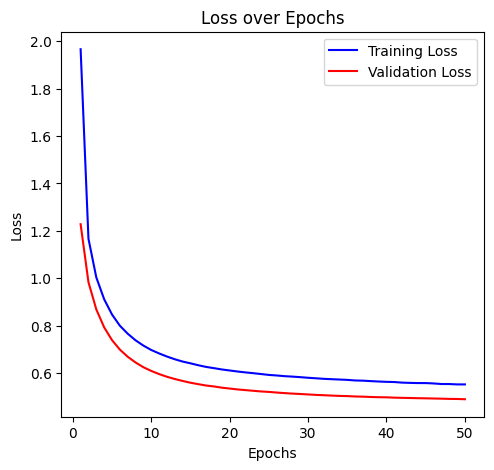

In [6]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

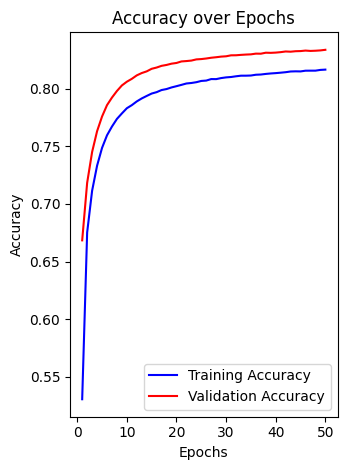

In [7]:
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
output_file = "mlp-1b.csv"
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Epoch", "Train Loss", "Train Accuracy", "Validation Loss", "Validation Accuracy"])
    for epoch in epochs:
        writer.writerow([
            epoch,
            train_loss[epoch - 1],
            train_accuracy[epoch - 1],
            val_loss[epoch - 1],
            val_accuracy[epoch - 1]
        ])

print(f"Training results saved to {output_file}")

Training results saved to mlp-1b.csv
